## <span style="color:navy"> Esercitazione 9</span>

#### The Travelling Salesman Problem
Il Travelling Salesman Problem riguarda un venditore che deve visitare $N$ città con posizioni $\vec{c}_k$, rispettando le seguenti regole:
1. Visita ogni città una sola volta
2. Ritorna al punto di partenza
3. Minimizza la distanza totale del percorso

La lunghezza del percorso è data da:
$$
L^{(1)}(\vec{x}_1, \ldots, \vec{x}_N) = \sum_{i=1}^N |\vec{x}_i - \vec{x}_{i+1}|
$$
dove $\vec{x}_{N+1} = \vec{x}_1$ (condizione di chiusura del percorso).

Un tragitto è una permutazione $P$ delle città, è posssibile esprimere un possibile percorso tramite un vettore 1D del tipo  $[1, 2, 3, 4, 5]$ che corrisponde a un tragitto che parte dalla città 1 e prima di tornarci passa dalle città $ 2, 3, 4, 5$ in questo ordine.

### <span style="color:teal"> Esercizio 9.1 </span>

L'obiettivo di questo esercizio è risolvere il TSP con un algoritmo genetico.
Un algoritmo genetico è una tecnica di ottimizzazione ispirata ai processi di evoluzione naturale: simula la selezione naturale, la riproduzione, la mutazione e la convergenza alla soluzione coincide con la sopravvivenza dei migliori individui per quell'ambiente.

In generale un algoritmo genetico consiste nella creazione di una "popolazione" di N "individui" e una funzione di "fitness" necessaria a valutare gli individui (determina quanto bene un individuo svolge il suo compito).

Ad ogni passo dell'algoritmo gli individui vengono classificati in base al loro fitness, segue una fase di riproduzione in cui gli individui migliori hanno più probabilità di accoppiarsi e infine una fase di mutazioni in cui alcuni individui randomicamente vengono selezionati e subiscono delle modifiche casuali, quest'ultima fase è fondamentale per uscire dai minimi locali ed esplorare tutto lo spazio delle fasi del sistema in considerazione.

Nel caso specifico di applicazione dell'algoritmo genetico al TSP ogni individuo corrisponde a uno specifico tragitto (un vettore di città) e la scelta del fitness da minimizzare è la lunghezza totale del tragitto, cioè la somma delle distanze tra una città e la successiva ($L^{(1)}$)

#### Struttura del codice
Ho strutturato il codice in due classi "Individuo" e "Popolazione" di seguito spiego sinteticamente il loro ruolo:

1. Individuo:
    - Ha come data membro _tragitto che è il vettore che contiene l'informazione sulla sequenza di città associate a quell'individuo
    - Ha implementate tutte le mutazioni che possono cambiare casualmente alcune caratteristiche del vettore _tragitto
    - Ha implementato un metodo check_tragitto che verifica che la prima città del vettore sia sempre 1 e non ci siano città ripetute nel vettore _tragitto (utile per verificare che le mutazioni o la riproduzione non violino queste condizioni)
2. Popolazione:
    - Il data membro principale è _generazione, un insieme di oggetti di tipo "Individuo"
    - Inoltre ha come data membri degni di menzione: una matrice (n_citta x 2) "_citta" che contiene le coordinate delle citta, una matrice "_distanze" (n_citta x n_citta) che contiene tutte le distanze tra una città e l'altra, un vettore "_fitness" che contiene i valori del fitness di ciascun individuo della popolazione e un vettore di indici "_ranking" che contiene gli indici del vettore "_fitness" ordinati in base all'ordine crescente dei valori del vettore di "_fitness".
    - Ha implementati i vari metodi "set_citta_*" per fissare i valori di "_citta" a seconda dell'esercizio.
    - Ha implementati i metodi "calcola_distanze" "calcola_fitness" e "calcola_ranking"
    - Ha implementati i metodi associati alle mutazioni che ciclano sugli individui e per ciascuno di loro richiamano con una certa probabilità la mutazione corrispondente.
    - Ha implementato il metodo di crossover tra individui.

Nel **main** passo da riga di comando un numero per fissare la configurazione delle città, creo un ogetto popopolazione, inizializzo con i metodi appositi i data membri _citta e _distanze.

Dopo di che ciclo sul numero di generazioni e per ciascuna generazione ripeto il seguente schema:

- Calcolo il fitness di tutti gli individui e li classifico
- Controllo che non siano state violate le condizioni del TSP con il metodo "check"
- Faccio riprodurre gli individui migliori con il metodo Crossover con una certa probabilità fissata
- Chiamo i metodi di mutazione con una probabilità fissata

#### Operatori genetici
Per concludere la spiegazione del codice descrivo le mutazioni implementate e il funzionamento del metodo di riproduzione, le modifiche al vettore _tragitto sono tali da non violare mai le condizioni del TSP.
1. Mutazioni:
   - Permutazione: scambia due città del vettore _tragitto scelte casualmente
   - Traslazione: trasla un blocco di citta all'interno del vettore _tragitto
   - Inversione: seleziona casualmente un blocco del vettore _tragitto e inverte l'ordine delle città in quella sottosequenza
   - Permutazione di un blocco: seleziona due blocchi di lunghezza uguale del vettore _tragitto e li scambia
2. Crossover:
   - Creo una matrice "figli" (n_individui x n_citta)
   - Scelgo due individui con una selezione truccata, in modo che sia più probabile prendere gli individui migliori
   - Genero un numero casuale e lo confronto con la probabilità di fare crossover, per valutare se la riproduzione avviene. Se non avviene, copio nella matrice "figli" i due individui selezionati così come sono e vado avanti, se il crossover avviene procedo come segue
   - Genero un intero t tra 0 a N_citta
   - Riordino la sottosequenza da t a n_citta di ognuno dei due vettori nell'ordine in cui quelle città appaiono nell'altro.
   - Così facendo ho generato due vettori di figli diversi che metto nella matrice "figli"
   - Ripeto il procedimento fino a quando non ho creato una nuova generazione completa composta da n_individui
   - Se il numero di individui è dispari, concludo il riempimento della matrice "figli" copiando all'ultima riga un individuo della generazione precedente senza crossover
     

Ho applicato il codice con 1000 individui e 180 generazioni all'ottimizzazione del percorso tra:
- 34 citta generate casualmente sulla circonferenza di raggio unitario centrata nell'origine
- 34 citta generate casualmente all'interno di un quadrato di lato 1

Per ciascun caso, ho riportato le figure con il miglior percorso trovato e l'andamento del fitness del miglior individuo di ciascuna generazione confrontato con la media dei migliori $\frac{n_{individui}}{2}$ in funzione delle generazioni

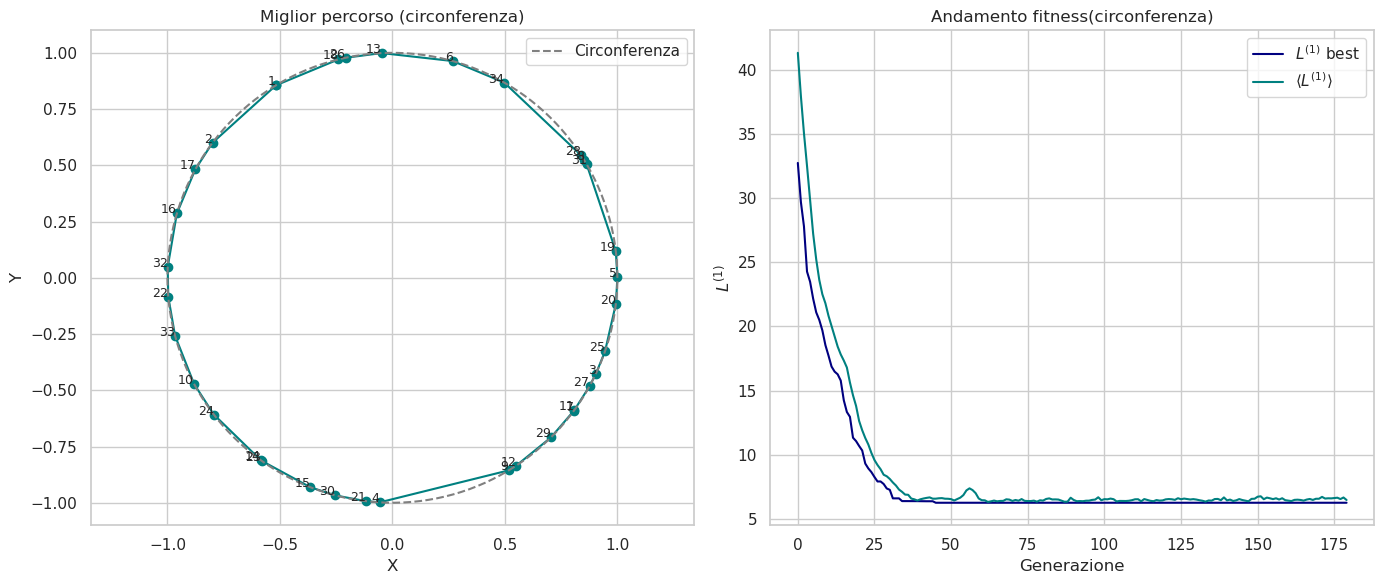

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", palette="muted")

def leggi_citta(file_citta):
    with open(file_citta, 'r') as f:
        righe = f.readlines()
    coords = {}
    for riga in righe:
        parti = riga.strip().split()
        if len(parti) == 3:
            idx = int(parti[0])
            x = float(parti[1])
            y = float(parti[2])
            coords[idx] = (x, y)
    return coords

def leggi_ultimo_percorso(file_best):
    with open(file_best, 'r') as f:
        righe = f.readlines()
    ultima_riga = righe[-1]
    return list(map(int, ultima_riga.strip().split()))

def plot_circonferenza(coords, percorso, L1_mean, L1_best):
    x = [coords[c][0] for c in percorso] + [coords[percorso[0]][0]]
    y = [coords[c][1] for c in percorso] + [coords[percorso[0]][1]]
    generations = np.arange(len(L1_mean))

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # === Percorso ===
    ax1 = axes[0]
    ax1.plot(x, y, marker='o', linestyle='-', color='teal')
    for city in percorso:
        ax1.text(coords[city][0], coords[city][1], str(city), fontsize=9, ha='right')

    # Circonferenza ideale tratteggiata
    theta = np.linspace(0, 2 * np.pi, 500)
    ax1.plot(np.cos(theta), np.sin(theta), linestyle='--', color='gray', label='Circonferenza')

    ax1.set_title("Miglior percorso (circonferenza)")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.axis('equal')
    ax1.legend()

    # === Loss ===
    ax2 = axes[1]
    sns.lineplot(x=generations, y=L1_best, label=r"$L^{(1)}$ best", ax=ax2, color='navy')
    sns.lineplot(x=generations, y=L1_mean, label=r"$\langle L^{(1)} \rangle$", ax=ax2, color='teal')
    ax2.set_title("Andamento fitness(circonferenza)")
    ax2.set_xlabel("Generazione")
    ax2.set_ylabel(r"$L^{(1)}$")
    ax2.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    coords = leggi_citta("citta_circonferenza.dat")
    percorso = leggi_ultimo_percorso("best_circonferenza.dat")
    data = np.loadtxt("ave_circonferenza.dat")
    L1_mean_c = data[:, 0]
    L1_best_c = data[:, 1]
    plot_circonferenza(coords, percorso, L1_mean_c, L1_best_c)


Il disegno del miglior percorso tra le città su una circonferenza (banale) ci dà una conferma del funzionamento del codice, possiamo osservare come il valore finale del fitness sia di poco minore di $2\pi$.

L'andamento del grafico a destra invece mostra la convergenza dell'algoritmo al miglior percorso dopo appena 50 generazioni. Osserviamo come, all'inizio, il fitness medio della generazione si discosti nettamente dal fitness del migliore mentre dopo un numero congruo di generazioni questi praticamente coincidano. Questo vuol dire che l'intera popolazione evolve verso soluzioni migliori e non solo pochi individui.

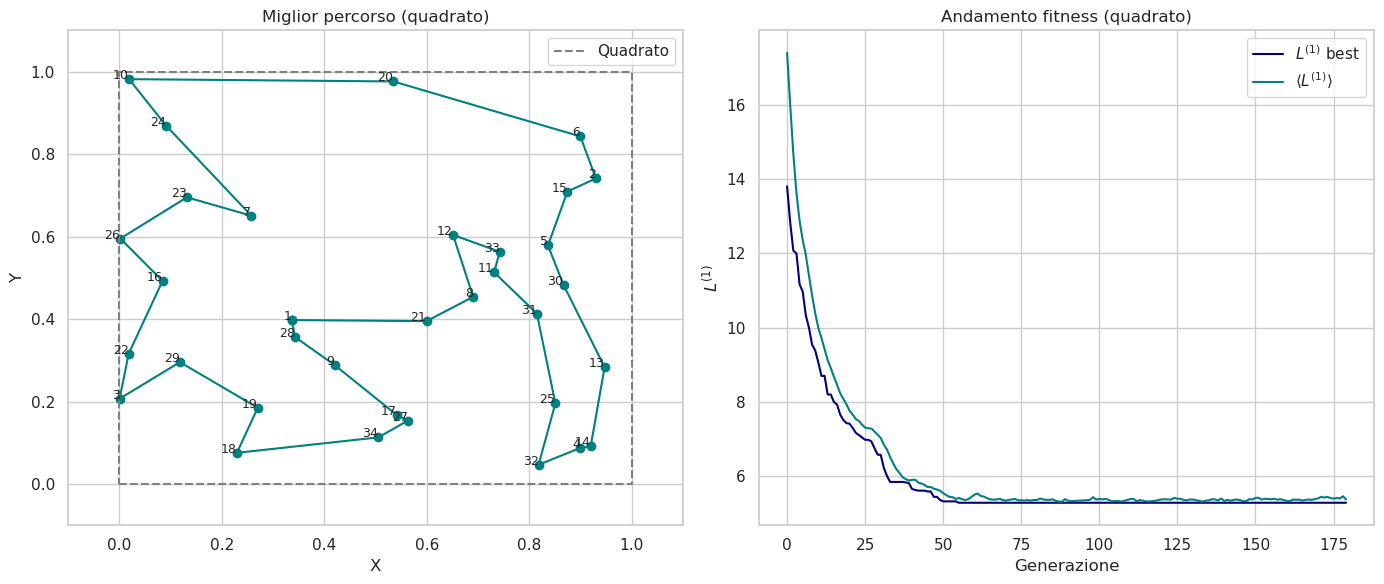

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def leggi_citta(file_citta):
    with open(file_citta, 'r') as f:
        righe = f.readlines()
    coords = {}
    for riga in righe:
        parti = riga.strip().split()
        if len(parti) == 3:
            idx = int(parti[0])
            x = float(parti[1])
            y = float(parti[2])
            coords[idx] = (x, y)
    return coords

def leggi_ultimo_percorso(file_best):
    with open(file_best, 'r') as f:
        righe = f.readlines()
    ultima_riga = righe[-1]
    percorso = list(map(int, ultima_riga.strip().split()))
    return percorso

def plot_quadrato(coords, percorso, L1_mean, L1_best):
    x = [coords[c][0] for c in percorso] + [coords[percorso[0]][0]]
    y = [coords[c][1] for c in percorso] + [coords[percorso[0]][1]]
    generations = np.arange(len(L1_mean))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # === Percorso migliore ===
    ax1.plot(x, y, marker='o', linestyle='-', color='teal')
    for city in percorso:
        ax1.text(coords[city][0], coords[city][1], str(city), fontsize=9, ha='right')

    # Quadrato ideale tratteggiato (da (0,0) a (1,1))
    square_x = [0, 1, 1, 0, 0]
    square_y = [0, 0, 1, 1, 0]
    ax1.plot(square_x, square_y, linestyle='--', color='gray', label='Quadrato')

    ax1.set_title("Miglior percorso (quadrato)")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_xlim(-0.1, 1.1)
    ax1.set_ylim(-0.1, 1.1)
    ax1.grid(True)
    ax1.legend()

    # === Loss ===
    ax2.plot(generations, L1_best, label=r"$L^{(1)}$ best", color='navy')
    ax2.plot(generations, L1_mean, label=r"$\langle L^{(1)} \rangle$", color='teal')
    ax2.set_title("Andamento fitness (quadrato)")
    ax2.set_xlabel("Generazione")
    ax2.set_ylabel(r"$L^{(1)}$")
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    coords = leggi_citta("citta_quadrato.dat")
    percorso = leggi_ultimo_percorso("best_quadrato.dat")
    data = np.loadtxt("ave_quadrato.dat")
    L1_mean_s = data[:, 0]
    L1_best_s = data[:, 1]
    plot_quadrato(coords, percorso, L1_mean_s, L1_best_s)


A differenza del caso precedente, non possiamo garantire che il percorso trovato tra le città generate all'interno del quadrato corrisponda a un minimo globale del valore di $L^{(1)}$. 


In ogni caso ci permette di apprezzare la potenza di un algoritmo di ottimizzazione come l'algoritmo genetico, infatti siamo riusciti a trovare una soluzione efficace al problema del TSP esplorando i $ N_{citta} !$ possibili percorsi

Inoltre il Genetic Algorithm è molto generico e facilmente adattabile a problemi di ogni tipo, basta cambiare il concetto di individuo e introdurre un fitness adatto al problema.